# Chapter 2 자연어와 단어의 분산 표현 

흔히 우리가 편소에 쓰는 말을 자연어라고 합니다. NLP를 해석하면 자연어를 처리하는 분야입니다. 그래서 자연어 처리의 목표는 사람의 말을 컴퓨터가 이해하도록 만들어서 컴퓨터가 우리에게 도움이 되는 일을 수행하게 하는 것입니다. 

우리의 말은 문자로 구성되며 말의 의미는 단어로 구성됩니다. 단어는 말하자면 의미의 최소단위입니다. 그래서 자연어를 컴퓨터에게 이해시킬데 단어의 의미를 이해시키는 게 중요합니다. 이러한 방법으로 시소러스 기반 기법, 통계 기반 기법, 추론 기반 기법이 있습니다. 

시소로스란 유의어 사전으로 비슷한 던어가 한 그룹으로 분류되어 있십니다. 

예 car -> auto, automobile, machine, motorcar

또한 자연어 처리에 이용되는 시소러스에서는 단어 사이의 상위와 하위 혹은 전체와 부분 등 더 세세한 관계까지 정의해둔 경우가 있습니다. 이러한 관계를 그래프로 표현하여 단어 사이의 연결을 정의할 수 있습니다. 그러면 컴퓨터에게 단어 사이의 관계를 가르칠 수 있습니다. 

자연어 처리 분야에서 가장 유명한 시소로스는 WordNet입니다. WordNet을 사용하면 유의어를 얻거나 단어 네트워크를 이용할 수 있습니다. 

시소러스 기반의 방식의 단점은 수많은 단어들을 사람이 수작업으로 레이블링을 하기 때문에 힘듭니다. 
- 시대 변화에 대응하기 어려움
- 비용 
- 미묘한 차이를 표현할 수 없다

이러한 문제로 통계 기반 기법과 신경망을 사용한 추론 기반 기법을 사람들이 사용합니다. 

통계 기반 기법 

통계 기반 기법에서는 말뭉치를 이용할 것입니다. 말뭉치는 간단히 말하면 자연어 처리 연구나 애플리케이션을 염두에 두고 수집된 다량의 텍스트 데이터입니다. 결국 말뭉치란 텍스트 데이터에 지나지 않습니다만, 그 안에 담긴 문장들은 사람이 쓴 글입니다. 다른 시각에서 생각해보면, 말뭉치에는 자연어에 대한 사람의 지식이 충분이 담겨 있다고 볼수있습니다. 통계 기반 기법의 목표는 이처럼 사람의 지식으로 가득한 말뭉치에서 자동으로, 그리고 효율적으로 그 핵심을 추출하는 것입니다. 

In [1]:
## 말뭉치 전처리 하기 

text = 'You say goodbye and I say hello.'
text = text.lower() ## 소문자 변환 
text = text.replace('.', ' .')
print(text)
words = text.split(' ')
words

you say goodbye and i say hello .


['you', 'say', 'goodbye', 'and', 'i', 'say', 'hello', '.']

In [2]:
word_to_id = {}
id_to_word = {}

for word in words: 
    if word not in word_to_id:
        new_id = len(word_to_id)
        word_to_id[word] = new_id
        id_to_word[new_id] = word

print(id_to_word)
print(word_to_id)

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}
{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}


In [3]:
print(id_to_word[1])
print(word_to_id['hello'])

say
5


In [4]:
import numpy as np 
corpus = [word_to_id[w] for w in words]
corpus = np.array(corpus)
corpus

array([0, 1, 2, 3, 4, 1, 5, 6])

In [5]:
## 한번에 처리 

def preprocess(text):
    text = text.lower() 
    text = text.replace('.', ' .')
    words = text.split(' ')
    word_to_id = {}
    id_to_word = {}

    for word in words: 
        if word not in word_to_id:
            new_id = len(word_to_id)
            word_to_id[word] = new_id
            id_to_word[new_id] = word

    corpus =  np.array([word_to_id[w] for w in words])
    return corpus, word_to_id, id_to_word

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

단어의 분산 표현 

단어의 의미를 정확하게 파알할 수 있는 벡터 표현입니다. 이를 자연어 처리 분야에서는 단어의 분산 표현 distributional representation이라고 합니다.
단어의 분산 표현은 단어를 고정 길이의 밀집벡터로 표현합니다. 밀집벡터라 함은 대부분의 원소가 0이 아닌 실수인 벡터를 말합니다. 예컨대 3차원의 분산 표현은 [0.21, 0.64, -0.49]와 같은 모습이 됩니다. 

분포 가설 

단어의 의미는 주변 단어에 의해 형성된다. 이를 분포 갓ㄹ이라 하여 단어를 벡터로 표현합니다. 단어 자체에는 의미가 없고, 그 단어가 사용된 맥락이 의미를 형성한다는 것이죠. 맥란이란 특정 단어를 중신에 둔 그 주변 단어를 말합니다. 

In [7]:
## 동시발생 행렬 
import numpy as np 

text = "You say goodbye and I say hello."
corpus, word_to_id, id_to_word = preprocess(text)
print(corpus)
print(id_to_word)

[0 1 2 3 4 1 5 6]
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


a만약 윈도우 크기를 1로 하고 단어 ID가 0인 You를 보면 you의 맥락은 say 단어 하나뿐입니다. 

You라는 단어를 [0, 1, 0, 0, 0, 0, 0]이란 벡터로 표현할 수 있습니다. 그리고 다른 단어도 이 와 비슷하게 표현할 수 있습니다. 이러한 백터로 행렬을 만들 수 있고 이것을 동시발생 행렬이라고 합니다. 

In [8]:
## co-occurence matrix 구현 
def create_co_matrix(corpus, vocab_size, window_size=1):
    corpus_size = len(corpus)
    co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32)
    
    for idx, word_id in enumerate(corpus):
        for i in range(1, window_size + 1):
            left_idx = idx - 1 
            right_idx = idx + 1
            if left_idx >= 0:
                left_word_id = corpus[left_idx]
                co_matrix[word_id, left_word_id] += 1 
            if right_idx < corpus_size:
                right_word_id = corpus[right_idx]
                co_matrix[word_id, right_word_id] += 1 
    return co_matrix

print(create_co_matrix(corpus, 8))

[[0 1 0 0 0 0 0 0]
 [1 0 1 0 1 1 0 0]
 [0 1 0 1 0 0 0 0]
 [0 0 1 0 1 0 0 0]
 [0 1 0 1 0 0 0 0]
 [0 1 0 0 0 0 1 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0]]


백터 간 유사도 
- 백터간 유사도를 계산하는 방법은 cosine similarity를 통해 구합니다. 
- 완전 같다면 유사도가 1이 되며 반대라면 -1이 됩니다. 

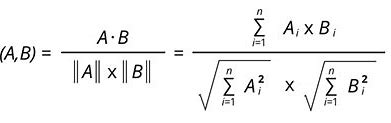

In [12]:
## cosime similiarity 

def cos_similarity(x, y, eps=1e-8):
    nx = x / (np.sqrt(np.sum(x ** 2)) + eps)
    ny = y / (np.sqrt(np.sum(y ** 2)) + eps)
    return np.dot(nx, ny)

## you and I의 cosine 유사도 

text = "You say goodbye and I say hello."
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
c0 = C[word_to_id['you']]
c1 = C[word_to_id['i']]
print(cos_similarity(c0, c1))

0.7071067691154799


In [13]:
## 유사 단어 랭킹 표시 

def most_similar(query, word_to_id, id_to_word, word_matrix, top=5):
    '''유사 단어 검색
    :param query: 쿼리(텍스트)
    :param word_to_id: 단어에서 단어 ID로 변환하는 딕셔너리
    :param id_to_word: 단어 ID에서 단어로 변환하는 딕셔너리
    :param word_matrix: 단어 벡터를 정리한 행렬. 각 행에 해당 단어 벡터가 저장되어 있다고 가정한다.
    :param top: 상위 몇 개까지 출력할 지 지정
    '''
    if query not in word_to_id:
        print('%s(을)를 찾을 수 없습니다.' % query)
        return

    print('\n[query] ' + query)
    query_id = word_to_id[query]
    query_vec = word_matrix[query_id]

    # 코사인 유사도 계산
    vocab_size = len(id_to_word)

    similarity = np.zeros(vocab_size)
    for i in range(vocab_size):
        similarity[i] = cos_similarity(word_matrix[i], query_vec)

    # 코사인 유사도를 기준으로 내림차순으로 출력
    count = 0
    for i in (-1 * similarity).argsort():
        if id_to_word[i] == query:
            continue
        print(' %s: %s' % (id_to_word[i], similarity[i]))

        count += 1
        if count >= top:
            return

In [15]:
text = "You say goodbye and I say hello."
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
most_similar('you', word_to_id, id_to_word, C, top=5)


[query] you
 goodbye: 0.7071067691154799
 i: 0.7071067691154799
 hello: 0.7071067691154799
 say: 0.0
 and: 0.0


통계 기반 기법 계산하기 

일반적으로 영어에서 the와 car가 같이 붙어 있는 비율이 car와 drive가 같이 붙어 있는 비율보다 훨씬 높습니다. 하지만 위에 방법을 통해서 얻은 백터로는 the와 car가 연관성이 높지만 실상에서는 그렇지 않다는 걸 압니다. 그래서 PMI라는 척도로 연관성을 측정합니다. 

Pointwise Mutual Information 점별 상호정보량은 확률 변수 x와 y에 대해 다음 식으로 정의됩니다. 
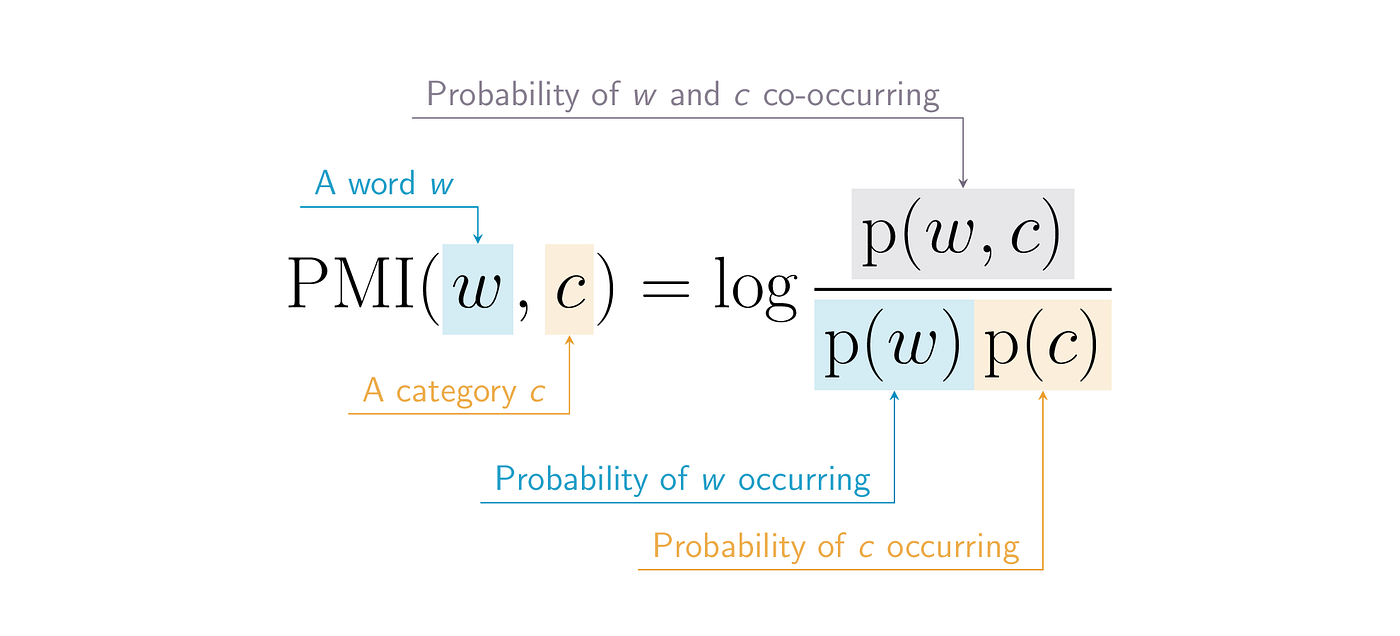
이 PMI값이 높으면 높을수록 관련성이 높다는 의미입니다. 

In [16]:
def ppmi(C, verbose=False, eps = 1e-8):
    '''PPMI(점별 상호정보량) 생성
    :param C: 동시발생 행렬
    :param verbose: 진행 상황을 출력할지 여부
    :return:
    '''
    M = np.zeros_like(C, dtype=np.float32)
    N = np.sum(C)
    S = np.sum(C, axis=0)
    total = C.shape[0] * C.shape[1]
    cnt = 0

    for i in range(C.shape[0]):
        for j in range(C.shape[1]):
            pmi = np.log2(C[i, j] * N / (S[j]*S[i]) + eps)
            M[i, j] = max(0, pmi)

            if verbose:
                cnt += 1
                if cnt % (total//100 + 1) == 0:
                    print('%.1f%% 완료' % (100*cnt/total))
    return M

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
W = ppmi(C)

np.set_printoptions(precision=3)  # 유효 자릿수를 세 자리로 표시
print('동시발생 행렬')
print(C)
print('-'*50)
print('PPMI')
print(W)

동시발생 행렬
[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]
--------------------------------------------------
PPMI
[[0.    1.807 0.    0.    0.    0.    0.   ]
 [1.807 0.    0.807 0.    0.807 0.807 0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.    1.807 0.    1.807 0.    0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.807 0.    0.    0.    0.    2.807]
 [0.    0.    0.    0.    0.    2.807 0.   ]]


차원 감소 
- 차원 감소는 백터의 차원을 줄이는 방법을 말합니다. 
- 핵심은 중요한 정보는 최대한 유지하면서 줄이는 게 핵심입니다
- 데이터의 분포를 고려해 중요한 축을 찾는 일을 수행합니다. 
- 이 책에서는 특잇값분해를 이용합니다. 
    - x = USV^T
    - U와 V는 orthogonal matrix고 열백터는 서로 orthogonal입니다. S는 대각형렬 입니다. 

[0 1 0 0 0 0 0]
[0.    1.807 0.    0.    0.    0.    0.   ]
[-1.110e-16  3.409e-01 -1.205e-01 -3.886e-16  0.000e+00 -9.323e-01
  8.768e-17]


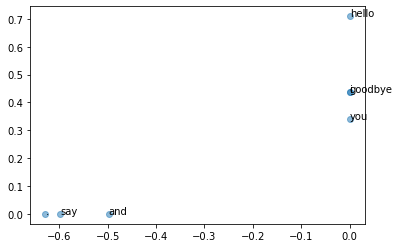

In [22]:
import matplotlib.pyplot as plt 
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(id_to_word)
C = create_co_matrix(corpus, vocab_size, window_size=1)
W = ppmi(C)

# SVD
U, S, V = np.linalg.svd(W)

np.set_printoptions(precision=3)  # 유효 자릿수를 세 자리로 표시
print(C[0])
print(W[0])
print(U[0])

# 플롯
for word, word_id in word_to_id.items():
    plt.annotate(word, (U[word_id, 0], U[word_id, 1]))
plt.scatter(U[:,0], U[:,1], alpha=0.5)
plt.show()

In [14]:
import sys
sys.path.append('..')
from dataset import ptb


corpus, word_to_id, id_to_word = ptb.load_data('train')

print('말뭉치 크기:', len(corpus))
print('corpus[:30]:', corpus[:30])
print()
print('id_to_word[0]:', id_to_word[0])
print('id_to_word[1]:', id_to_word[1])
print('id_to_word[2]:', id_to_word[2])
print()
print("word_to_id['car']:", word_to_id['car'])
print("word_to_id['happy']:", word_to_id['happy'])
print("word_to_id['lexus']:", word_to_id['lexus'])

Done
말뭉치 크기: 929589
corpus[:30]: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

id_to_word[0]: aer
id_to_word[1]: banknote
id_to_word[2]: berlitz

word_to_id['car']: 3856
word_to_id['happy']: 4428
word_to_id['lexus']: 7426


In [15]:
import sys
sys.path.append('..')
import numpy as np
from common.util import most_similar, create_co_matrix, ppmi
from dataset import ptb


window_size = 2
wordvec_size = 100

corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
print('동시발생 수 계산 ...')
C = create_co_matrix(corpus, vocab_size, window_size)
print('PPMI 계산 ...')
W = ppmi(C, verbose=True)

print('calculating SVD ...')
try:
    # truncated SVD (빠르다!)
    from sklearn.utils.extmath import randomized_svd
    U, S, V = randomized_svd(W, n_components=wordvec_size, n_iter=5,
                             random_state=None)
except ImportError:
    # SVD (느리다)
    U, S, V = np.linalg.svd(W)

word_vecs = U[:, :wordvec_size]

querys = ['you', 'year', 'car', 'toyota']
for query in querys:
    most_similar(query, word_to_id, id_to_word, word_vecs, top=5)

동시발생 수 계산 ...
PPMI 계산 ...


C:\Users\edd6d\Deep Learning From Scratch2\Chapter 2\..\common\util.py:141: RuntimeWarning: overflow encountered in long_scalars
  pmi = np.log2(C[i, j] * N / (S[j]*S[i]) + eps)
C:\Users\edd6d\Deep Learning From Scratch2\Chapter 2\..\common\util.py:141: RuntimeWarning: invalid value encountered in log2
  pmi = np.log2(C[i, j] * N / (S[j]*S[i]) + eps)


1.0% 완료
2.0% 완료
3.0% 완료
4.0% 완료
5.0% 완료
6.0% 완료
7.0% 완료
8.0% 완료
9.0% 완료
10.0% 완료
11.0% 완료
12.0% 완료
13.0% 완료
14.0% 완료
15.0% 완료
16.0% 완료
17.0% 완료
18.0% 완료
19.0% 완료
20.0% 완료
21.0% 완료
22.0% 완료
23.0% 완료
24.0% 완료
25.0% 완료
26.0% 완료
27.0% 완료
28.0% 완료
29.0% 완료
30.0% 완료
31.0% 완료
32.0% 완료
33.0% 완료
34.0% 완료
35.0% 완료
36.0% 완료
37.0% 완료
38.0% 완료
39.0% 완료
40.0% 완료
41.0% 완료
42.0% 완료
43.0% 완료
44.0% 완료
45.0% 완료
46.0% 완료
47.0% 완료
48.0% 완료
49.0% 완료
50.0% 완료
51.0% 완료
52.0% 완료
53.0% 완료
54.0% 완료
55.0% 완료
56.0% 완료
57.0% 완료
58.0% 완료
59.0% 완료
60.0% 완료
61.0% 완료
62.0% 완료
63.0% 완료
64.0% 완료
65.0% 완료
66.0% 완료
67.0% 완료
68.0% 완료
69.0% 완료
70.0% 완료
71.0% 완료
72.0% 완료
73.0% 완료
74.0% 완료
75.0% 완료
76.0% 완료
77.0% 완료
78.0% 완료
79.0% 완료
80.0% 완료
81.0% 완료
82.0% 완료
83.0% 완료
84.0% 완료
85.0% 완료
86.0% 완료
87.0% 완료
88.0% 완료
89.0% 완료
90.0% 완료
91.0% 완료
92.0% 완료
93.0% 완료
94.0% 완료
95.0% 완료
96.0% 완료
97.0% 완료
98.0% 완료
99.0% 완료
calculating SVD ...

[query] you
 i: 0.6945130825042725
 we: 0.67898029088974
 anybody: 0.5693432688713074
 do: 0.5214